# Importação da bibliotecas

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import utils_imagem as utl

# Definição de constantes

In [2]:
m = 180 # altura da imagem
n = 130 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Altera o valor da constante no módulo de processamento de imagens
utl.DIMENSAO_IMAGEM = DIMENSAO_IMAGEM

# Posição da imagem na matriz A
indice_yuri = 20

# Gerar matrizes A e M, e a face média 

In [3]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q_1, A_1) = utl.varrer_banco_imagens('src/EMAP_face_db/*')
(q_2, A_2) = utl.varrer_banco_imagens('src/FEI_face_db/*')

# Juntando as duas partes para a matriz definitiva
q = q_1 + q_2
A = np.hstack((A_1, A_2))

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Matriz M(mn x q) de média corrigida
M = A - face_media 

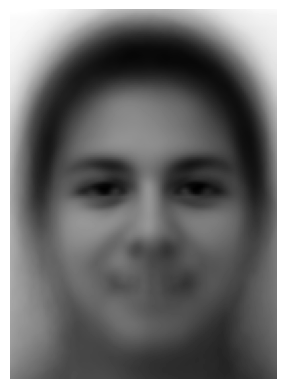

In [4]:
utl.plotar_imagem(face_media)

# Gerar matrizes U e C

In [5]:
# Matriz de covariância de A, C(mn x mn)
C = np.cov(M)

In [6]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_C, autovalores_C, VT_C = randomized_svd(C, n_components=200, n_iter=5, random_state=None)

In [7]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_A, autovalores_A, _ = np.linalg.svd(A, full_matrices=False) # U já está ordenada em relação aos autovalores

In [8]:
# Apaga C da memória (liberando 4gb) por não ser mais necessária
del C

# Reconstrução a partir de A (SVD) e C (PCA)

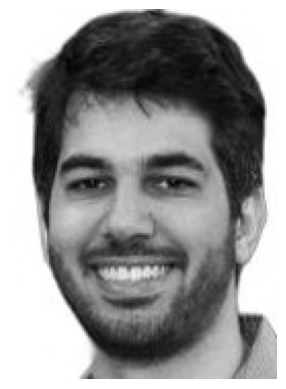

In [9]:
# Indice a imagem a ser reconstruida
imagem_escolhida = indice_yuri
utl.plotar_imagem(A[:,imagem_escolhida])

In [10]:
# Coeficientes de projeção para as eigenfaces de U_A e U_C
coeficientes_A = np.dot(U_A.T, M)
coeficientes_C = np.dot(U_C.T, M)

In [11]:
# Instaciação de variáveis
lista_A = []
lista_C = []
qtd_testes = 0

# Define intervalo para a quantidade de dimensoes para a reconstrução
intervalo = [10, 20, 40, 60, 75, 90, 120, 150, 200, 250, 300, 350, 430]

for dimensao in intervalo :
    qtd_testes += 1
    
    # Reconstrução da imagem usando as eigenfaces
    imagem_reconstruida_A = np.dot(U_A[:, :dimensao], coeficientes_A[:dimensao, :]) + face_media
    imagem_reconstruida_C = np.dot(U_C[:, :dimensao], coeficientes_C[:dimensao, :]) + face_media
    
    # Remodelar a imagem reconstruída para as dimensões originais
    imagem_reconstruida_A = imagem_reconstruida_A[:,imagem_escolhida]
    imagem_reconstruida_C = imagem_reconstruida_C[:,imagem_escolhida]

    # Salvar imagem em uma lista
    lista_A.append(imagem_reconstruida_A)
    lista_C.append(imagem_reconstruida_C)

In [12]:
# Converte as listas em matrizes
A_rec = np.array(lista_A).T
C_rec = np.array(lista_C).T

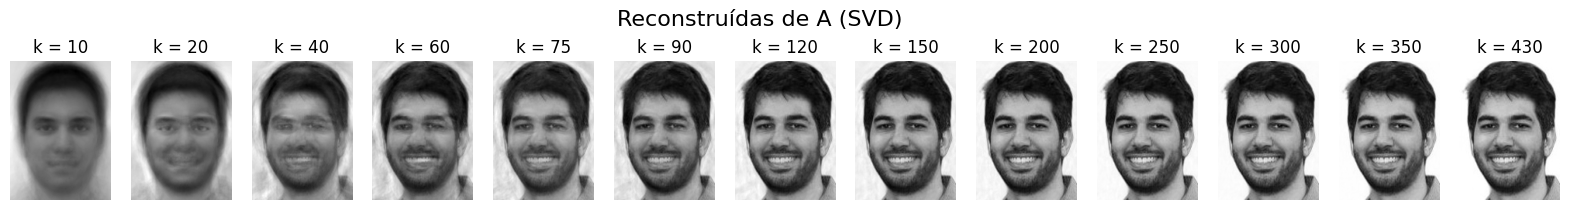

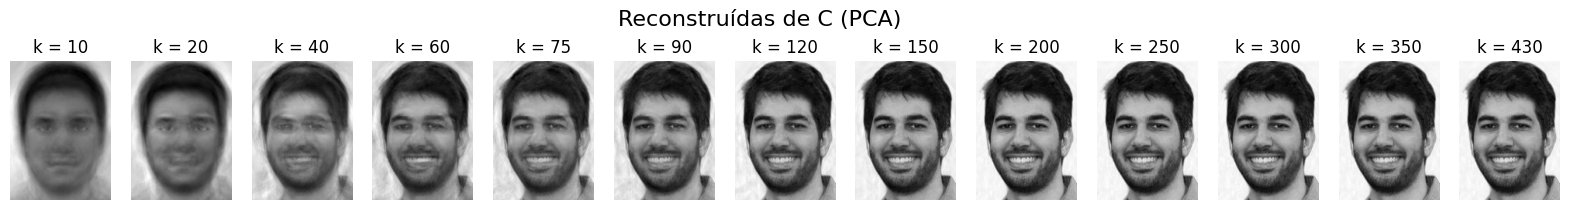

In [13]:
utl.plotar_grade(A_rec, intervalo, 1, qtd_testes, (20,2.5), 'Reconstruídas de A (SVD)')
utl.plotar_grade(C_rec, intervalo, 1, qtd_testes, (20,2.5), 'Reconstruídas de C (PCA)')